In [1]:
import numpy as np
import os
import sys


In [2]:
sys.path.append('/home/caffe-user/caffe/python/')


In [3]:
import caffe


In [4]:
caffe.set_mode_gpu()


In [5]:
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline


In [53]:
from scipy import signal

In [7]:
net = caffe.Net('/downloads/kenglish/models/placesCNN/places205CNN_deploy.prototxt', '/downloads/kenglish/models/placesCNN/places205CNN_iter_300000.caffemodel', caffe.TEST)


In [8]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})


In [10]:
# This is from our current code which uses ILSVRC_2012 image set for training
# The PlacesNet image set is different
trans_model = np.load('/home/caffe-user/caffe/python/caffe/imagenet/ilsvrc_2012_mean.npy')


In [12]:
# the mean of any dataset composed of natural images should be close to [104, 117, 123].
# My guess for greyscale is 115 ... 
trans_model.mean(1).mean(1)



array([ 104.00698793,  116.66876762,  122.67891434])

In [17]:
transformer.set_transpose('data', (2, 0, 1))
# Values from BlobProto notebook from places205CNN_mean.binaryproto
transformer.set_mean('data', np.array([ 104.92972906,  113.25471069,  116.2096921 ]))
transformer.set_raw_scale('data', 255)
transformer.set_channel_swap('data', (2, 1, 0))


In [18]:
def myTestFiles():
    file_list = []
    with open('/downloads/kenglish/data/protest_concert/files.lst', 'r') as f:
        for line in f:
            fpath = line.rstrip()
            file_list.append(fpath)
    return file_list

In [19]:
# NOTE:  I had to delete corrupted files from the file list
files = myTestFiles()
net.blobs['data'].reshape(len(files), 3, 227, 227)
i = 0
for fpath in files:
    net.blobs['data'].data[i] = transformer.preprocess('data', caffe.io.load_image(fpath))
    i += 1


/downloads/kenglish/data/protest_concert/day_concert/images (21).jpg
/downloads/kenglish/data/protest_concert/day_concert/Verizon-Wireless-Amphitheater-Irvine.jpg
/downloads/kenglish/data/protest_concert/day_concert/images.jpg
/downloads/kenglish/data/protest_concert/day_concert/images (2).jpg
/downloads/kenglish/data/protest_concert/day_concert/images (22).jpg
/downloads/kenglish/data/protest_concert/day_concert/images (15).jpg
/downloads/kenglish/data/protest_concert/day_concert/NMDConcert_Capitol_3.jpg
/downloads/kenglish/data/protest_concert/day_concert/149314031.jpg
/downloads/kenglish/data/protest_concert/day_concert/2011_may-day_13038584088229.png
/downloads/kenglish/data/protest_concert/day_concert/danielle-bradbery-set-to-headline-memorial-day-concert-11.jpg
/downloads/kenglish/data/protest_concert/day_concert/5728bde51c94c.image.jpg
/downloads/kenglish/data/protest_concert/day_concert/images (18).jpg
/downloads/kenglish/data/protest_concert/day_concert/o.jpg
/downloads/kengli

In [20]:
net.forward()

{'prob': array([[  3.18476036e-02,   6.25328452e-04,   5.79774351e-05, ...,
           2.18029818e-04,   1.65074060e-04,   1.89294741e-02],
        [  1.42688383e-04,   3.35191522e-04,   5.56830666e-04, ...,
           1.20662880e-04,   4.43004334e-04,   4.06470662e-03],
        [  6.33405443e-06,   8.57481064e-06,   4.08893320e-05, ...,
           6.10001109e-07,   1.02734646e-06,   1.94984350e-05],
        ..., 
        [  1.29576118e-04,   8.87716596e-04,   3.45480815e-03, ...,
           6.97018868e-06,   3.76496209e-05,   3.35488876e-05],
        [  1.55824207e-04,   3.64760672e-05,   7.01424840e-04, ...,
           5.98932675e-05,   3.53851035e-04,   1.13827083e-03],
        [  7.93358340e-05,   1.71571155e-04,   1.22411258e-03, ...,
           1.26472238e-04,   1.34341448e-04,   3.82153405e-04]], dtype=float32)}

In [28]:
f0 = net.blobs['conv3'].data[0]

In [30]:
f0.shape

(384, 13, 13)

In [31]:
net.blobs['conv4'].data[0].shape

(384, 13, 13)

In [33]:
net.blobs.keys()

['data',
 'conv1',
 'pool1',
 'norm1',
 'conv2',
 'pool2',
 'norm2',
 'conv3',
 'conv4',
 'conv5',
 'pool5',
 'fc6',
 'fc7',
 'fc8',
 'prob']

In [35]:
net.blobs['norm2'].data[0].shape

(256, 13, 13)

In [37]:
min(net.blobs['norm2'].data[0].flatten()) , max(net.blobs['norm2'].data[0].flatten())

(0.0, 138.60257)

In [39]:
np.dot(net.blobs['norm2'].data[0].flatten()/256.0,net.blobs['norm2'].data[1].flatten()/256.0)

243.06351

In [ ]:
feat = [ net.blobs['conv3'].data[i] for i in range(len(net.blobs['data'].data))]

In [40]:
repr(net.blobs['norm2'])

'<caffe._caffe.Blob object at 0x7f3eed727140>'

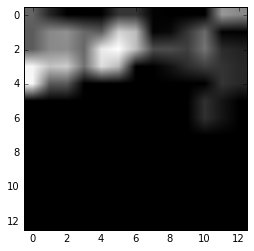

In [56]:
plt.imshow(net.blobs['norm2'].data[0][0], cmap = plt.get_cmap('gray'))

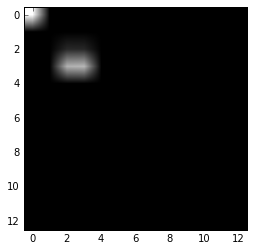

In [57]:
plt.imshow(net.blobs['norm2'].data[1][0], cmap = plt.get_cmap('gray'))

In [54]:
c = signal.convolve(net.blobs['norm2'].data[0][0], net.blobs['norm2'].data[1][0])

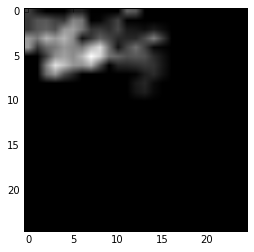

In [55]:
plt.imshow(c, cmap = plt.get_cmap('gray'))

In [58]:
max(c.flatten())

7120.0938

In [59]:
sum(c.flatten())

251275.12438583374

In [60]:
v_white = [255.0] * 13
m_white = [v_white] * 13
a_white = np.array(m_white)
c_white = signal.convolve(a_white, a_white)

In [61]:
max(c_white.flatten())

10989225.0

In [62]:
10989225.0 / 255.0

43095.0

In [63]:
c_white.shape

(25, 25)

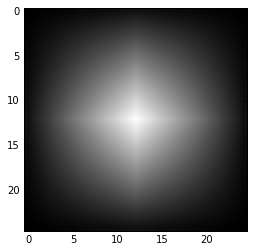

In [64]:
plt.imshow(c_white, cmap = plt.get_cmap('gray'))

In [65]:
v_black = [0.0] * 13
m_black = [v_black] * 13
a_black = np.array(m_black)
c_black = signal.convolve(a_black, a_black)

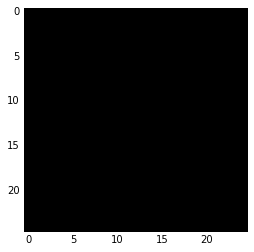

In [66]:
plt.imshow(c_black, cmap = plt.get_cmap('gray'))

In [76]:
def dist(V, W, scale):
    D = (W.flatten() - V.flatten()) / scale
    return np.dot(D, D)/np.prod(V.shape)

In [77]:
dist(net.blobs['norm2'].data[0][0], net.blobs['norm2'].data[1][0], 255.0)

0.0074506398488783975

In [81]:
N_images = len(net.blobs['norm2'].data)
all_distances = []
for i in range(N_images):
    for ii in range(i+1, N_images):
        for j in range(256):
            d = dist(net.blobs['norm2'].data[i][j], net.blobs['norm2'].data[ii][j], 255.0)
            all_distances.append((d, i, ii, j))
all_distances.sort()
all_distances[0:10]
all_distances[-10:]

[(0.12527861961951622, 48, 83, 91),
 (0.12531983640772351, 25, 68, 79),
 (0.12633571963338458, 25, 106, 79),
 (0.12633571963338458, 25, 120, 79),
 (0.12749055715707633, 25, 36, 79),
 (0.12877155055661174, 25, 160, 79),
 (0.12890812349037306, 25, 65, 79),
 (0.12998227678107085, 25, 155, 79),
 (0.1355112403102175, 25, 149, 79),
 (0.1386443030904736, 22, 115, 104)]

In [84]:
len(all_distances)

4942336

In [108]:
# TOP of match list:
# There are a number of exact matches between a given feature identified in pairs of images
def exactMatchCount():
    n = 0
    for tup in all_distances:
        if tup[0] < 0.000000001:
            n = n + 1
        else:
            # (all_distances is sorted)
            break
    return n
exactMatchCount()

17905

In [107]:
# MIDDLE of match list:
middle_index = len(all_distances)/2
all_distances[middle_index-5:middle_index+5]

[(0.0108025504287178, 108, 139, 144),
 (0.010802554661000269, 23, 191, 213),
 (0.0108025687686085, 15, 103, 244),
 (0.010802575117032203, 136, 167, 167),
 (0.010802583581597141, 144, 169, 89),
 (0.010802584992357965, 22, 36, 191),
 (0.010802585697738377, 69, 155, 25),
 (0.010802606859150722, 41, 171, 82),
 (0.010802608975291958, 81, 177, 43),
 (0.010802613912954838, 106, 139, 175)]

In [109]:
# BOTTOM of match list:
# We see that the way we computed "distance" doesn't give the most intuitive numerical results ...
# "0.138" is FAR FAR Away and as different as two features can get in this computation
all_distances[-10:]

[(0.12527861961951622, 48, 83, 91),
 (0.12531983640772351, 25, 68, 79),
 (0.12633571963338458, 25, 106, 79),
 (0.12633571963338458, 25, 120, 79),
 (0.12749055715707633, 25, 36, 79),
 (0.12877155055661174, 25, 160, 79),
 (0.12890812349037306, 25, 65, 79),
 (0.12998227678107085, 25, 155, 79),
 (0.1355112403102175, 25, 149, 79),
 (0.1386443030904736, 22, 115, 104)]

In [94]:
# pulls the top ==num== pairs from the sorted all_distances array.
def topPairs(num):
    pair_dict = {}
    for i in range(num):
        pair = (all_distances[i][1], all_distances[i][2])
        if pair not in pair_dict:
            pair_dict[pair] = 0
        pair_dict[pair] = pair_dict[pair] + 1
    pair_list = []
    for pair in pair_dict:
        pair_list.append( (pair_dict[pair], pair))
    pair_list.sort(reverse=True)
    return pair_list

In [97]:
topPairs(len(all_distances)/8)

[(256, (145, 147)),
 (256, (126, 131)),
 (256, (122, 142)),
 (256, (121, 138)),
 (256, (116, 148)),
 (256, (113, 128)),
 (256, (106, 120)),
 (256, (102, 143)),
 (256, (101, 148)),
 (256, (101, 116)),
 (256, (99, 125)),
 (256, (31, 33)),
 (226, (125, 137)),
 (226, (99, 137)),
 (111, (7, 24)),
 (110, (24, 35)),
 (109, (7, 35)),
 (103, (7, 45)),
 (102, (28, 35)),
 (102, (24, 25)),
 (101, (28, 45)),
 (99, (7, 28)),
 (97, (114, 146)),
 (97, (35, 45)),
 (97, (25, 35)),
 (96, (22, 24)),
 (95, (22, 45)),
 (94, (22, 28)),
 (93, (2, 35)),
 (92, (45, 156)),
 (92, (2, 24)),
 (91, (24, 156)),
 (91, (24, 28)),
 (91, (22, 35)),
 (91, (7, 22)),
 (90, (35, 156)),
 (90, (35, 48)),
 (90, (24, 45)),
 (89, (7, 156)),
 (88, (28, 34)),
 (88, (22, 25)),
 (88, (7, 25)),
 (87, (28, 156)),
 (87, (2, 48)),
 (87, (2, 25)),
 (86, (25, 156)),
 (86, (25, 48)),
 (85, (34, 45)),
 (85, (25, 45)),
 (84, (125, 147)),
 (84, (125, 145)),
 (84, (99, 147)),
 (84, (99, 145)),
 (84, (34, 35)),
 (84, (7, 180)),
 (83, (146, 147))

In [99]:
def getTag(imageNum):
    tag = ""
    if imageNum < 51:
        tag = "day_concert"
    elif imageNum < 100:
        tag = "day_protest"
    elif imageNum < 150:
        tag = "night_concert"
    else:
        tag = "night_protest"
    return tag


In [101]:
with open('/downloads/kenglish/data/protest_concert/closest_images_by_norm2_distance.tab', 'w') as f:
    for tup in topPairs(len(all_distances)/8):
        t0 = getTag(tup[1][0])
        t1 = getTag(tup[1][1])
        x = 1
        if t0 != t1:
            x = 0
        print >> f, '\t'.join(map(str, [tup[1][0], tup[1][1], tup[0], t0, t1, x ]))

In [102]:
len(files)

197

In [104]:
197*196/2

19306

In [106]:
# find how many pairs 'match' for a given match count score
def pairCountsByCountBySortedFraction(fraction):
    pair_counts_by_count = []
    top_pair_fraction_by_distance = topPairs(int(fraction * len(all_distances)))
    for i in range(256):
        min_score = 256 - i
        count = 0
        for pair in top_pair_fraction_by_distance:
            if pair[0] < min_score:
                break
            count = count + 1
        pair_counts_by_count.append((min_score, count))
    return pair_counts_by_count

pairCountsByCountBySortedFraction(1.0/8.0)

[(256, 12),
 (255, 12),
 (254, 12),
 (253, 12),
 (252, 12),
 (251, 12),
 (250, 12),
 (249, 12),
 (248, 12),
 (247, 12),
 (246, 12),
 (245, 12),
 (244, 12),
 (243, 12),
 (242, 12),
 (241, 12),
 (240, 12),
 (239, 12),
 (238, 12),
 (237, 12),
 (236, 12),
 (235, 12),
 (234, 12),
 (233, 12),
 (232, 12),
 (231, 12),
 (230, 12),
 (229, 12),
 (228, 12),
 (227, 12),
 (226, 14),
 (225, 14),
 (224, 14),
 (223, 14),
 (222, 14),
 (221, 14),
 (220, 14),
 (219, 14),
 (218, 14),
 (217, 14),
 (216, 14),
 (215, 14),
 (214, 14),
 (213, 14),
 (212, 14),
 (211, 14),
 (210, 14),
 (209, 14),
 (208, 14),
 (207, 14),
 (206, 14),
 (205, 14),
 (204, 14),
 (203, 14),
 (202, 14),
 (201, 14),
 (200, 14),
 (199, 14),
 (198, 14),
 (197, 14),
 (196, 14),
 (195, 14),
 (194, 14),
 (193, 14),
 (192, 14),
 (191, 14),
 (190, 14),
 (189, 14),
 (188, 14),
 (187, 14),
 (186, 14),
 (185, 14),
 (184, 14),
 (183, 14),
 (182, 14),
 (181, 14),
 (180, 14),
 (179, 14),
 (178, 14),
 (177, 14),
 (176, 14),
 (175, 14),
 (174, 14),
 (17